<div style="color:white;display:fill;border-radius:2px;background-color:#065222;font-size:32px;font-family:Nexa;letter-spacing:0.5px"><p style="padding: 10px;color:#f2f2f2; text-align: center;"> <b>  EDA With Avocado Sales  </b>
        <img src="analytics.png" width="60">
    </p>     
</div>

 <center><img src="av1.png" width="200"></center> 

<a id="link0"></a>
<div style="color:white;display:fill;border-radius:2px;background-color:#141e66;font-size:32px;font-family:Nexa;letter-spacing:0.5px">
        <p style="padding: 10px;color:#f2f2f2;"><b>Table of Contents</b></p>
</div>
 
1) <a target="_self" href="#link1">About Data Set</a>
2) <a target="_self" href="#link2">Problem Statement</a>
3) <a target="_self" href="#link3">Import Packages</a>
4) <a target="_self" href="#link4">Data Loading and Description</a>
5) <a target="_self" href="#link5">Preprocessing</a>
6) <a target="_self" href="#link6">Solution For Problem Statemnts</a>
7) <a target="_self" href="#link7">Findings and Conclusions</a>

<a target="_self" href="#link0" id="link1" style="color:green;font-weight:700;font-size:20px;">1) About Avocado Prices:</a><br>
Historical data on avocado prices and sales volume in multiple US markets
<br><span style="color:#8c1482;font-weight:700;font-size:16px;">Content</span><br>
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
<br><span style="color:#8c1482;font-weight:700;font-size:16px;">Some relevant columns in the dataset:</span><br>
- __Date__ : The date of the observation
- __AveragePrice__ : The average price of a single avocado
- __type__ : Conventional or organic
- __year__ : The year
- __Region__ : The city or region of the observation
- __Total Volume__ : Total number of avocados sold
- __4046__ : Total number of avocados with PLU 4046 sold
- __4225__ : Total number of avocados with PLU 4225 sold
- __4770__ : Total number of avocados with PLU 4770 sold

<a target="_self" href="#link0" id="link2" style="color:green;font-weight:700;font-size:20px;">2) Problem Statement:</a>
1) Demand for the type of avacados over the years
2) avacado sales per region all the years
3) top 5 and bottom 5 sales regions.
4) sales per every quarter over the years
5) sales per months over the years
6) Price line over all days. How price is distributed over the date?
7) TOP 5 and bottom 5 regions of Average price?
8) In which year and for which region was the Average price the highest?
9) correlation map

<a target="_self" href="#link0" id="link3" style="color:green;font-weight:700;font-size:20px;">3) Import Packages:</a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

<a target="_self" href="#link0" id="link4" style="color:green;font-weight:700;font-size:20px;">4) Data Loading and Description:</a>

In [1]:
# df= pd.read_csv('avocado.csv', index_col=0)
df= pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [2]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [3]:
print('Number of Rows, Columns =',df.shape)
df.info()

Number of Rows, Columns = (18249, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


<a target="_self" href="#link0" id="link5" style="color:green;font-weight:700;font-size:20px;">5) Preprocessing:</a>

In [4]:
# Change Column names
print('Old Column Names: \n',df.columns)
df.rename(columns = {'Total Volume':'Total_Volume'}, inplace = True)  
# After renaming the columns
print('\nNew Column Names: \n',df.columns)

Old Column Names: 
 Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

New Column Names: 
 Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total_Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [5]:
# Drop Unnamed
print('Old Column Names: \n',df.columns)
df.drop(df.columns[0], axis=1, inplace=True)
print('New Column Names: \n',df.columns)

Old Column Names: 
 Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total_Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')
New Column Names: 
 Index(['Date', 'AveragePrice', 'Total_Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


In [6]:
# Convert Date to Date time
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total_Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [7]:
# Check For Missing Values
print("Data:",df.isnull().sum())

Data: Date            0
AveragePrice    0
Total_Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [8]:
# Unique And Sorting if needed
df['Date'].sort_values(ascending=False).unique()

<DatetimeArray>
['2018-03-25 00:00:00', '2018-03-18 00:00:00', '2018-03-11 00:00:00',
 '2018-03-04 00:00:00', '2018-02-25 00:00:00', '2018-02-18 00:00:00',
 '2018-02-11 00:00:00', '2018-02-04 00:00:00', '2018-01-28 00:00:00',
 '2018-01-21 00:00:00',
 ...
 '2015-03-08 00:00:00', '2015-03-01 00:00:00', '2015-02-22 00:00:00',
 '2015-02-15 00:00:00', '2015-02-08 00:00:00', '2015-02-01 00:00:00',
 '2015-01-25 00:00:00', '2015-01-18 00:00:00', '2015-01-11 00:00:00',
 '2015-01-04 00:00:00']
Length: 169, dtype: datetime64[ns]

In [9]:
# Pandas Inbuilt methods for time series.
# df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter
df['day_name'] = df['Date'].dt.day_name()
df.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,quarter,day_name
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,4,Sunday
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,4,Sunday
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,4,Sunday
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,4,Sunday
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,4,Sunday


<a target="_self" href="#link0" id="link6" style="color:green;font-weight:700;font-size:20px;">6) Solutions For Problem Statemnts:</a>

### 1) Demand for the type of avacados over the years

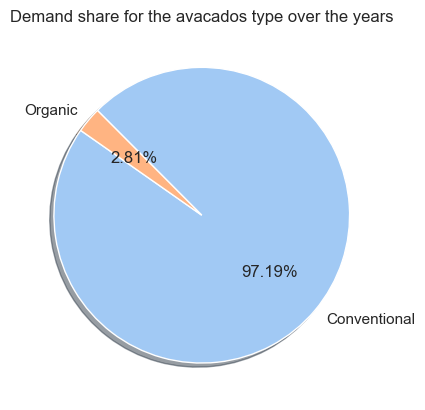

In [10]:
palette_color = sns.color_palette('pastel') 
# Caliculate Total produce by each crop type.
Produce_By_type=df.groupby('type')['Total_Volume'].agg('sum')

# Declaring data 
values=[Produce_By_type['conventional'],Produce_By_type['organic']]
labels=['Conventional','Organic']
  
# plotting data on chart 
plt.pie(values, labels=labels, colors=palette_color, autopct='%.2f%%', shadow=True, startangle=145)
plt.title("Demand share for the avacados type over the years");
  
# displaying chart 
plt.show() 

In [11]:
# Sales per year
# Create bins and lables for Year column

bins = [2014,2015,2016,2017,2018]
labels = ['2015-2016','2016-2017','2017-2018','2018-2019']
# Sales over years
df['years_Category'] = pd.cut(df['year'],bins,labels = labels)
df['years_Category'].value_counts()

years_Category
2017-2018    5722
2016-2017    5616
2015-2016    5615
2018-2019    1296
Name: count, dtype: int64

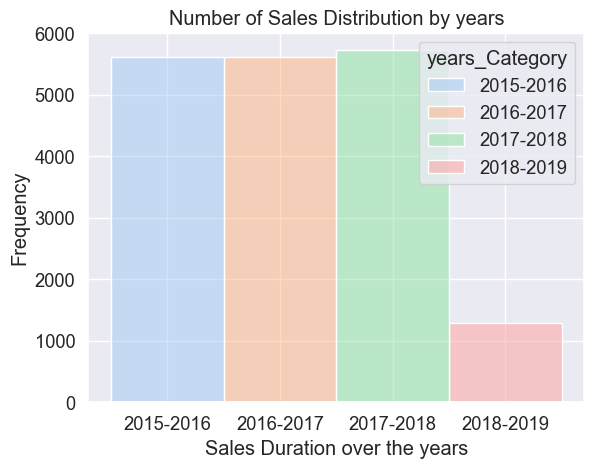

In [12]:
# Plot histogram using the binned column
sns.set(font_scale=1.2)
sns.histplot(data=df, x="years_Category", stat="count", discrete=True, hue = "years_Category", palette= palette_color)
plt.title("Number of Sales Distribution by years")
plt.xlabel('Sales Duration over the years')
plt.ylabel('Frequency');

### 2) avacado sales per region all the years

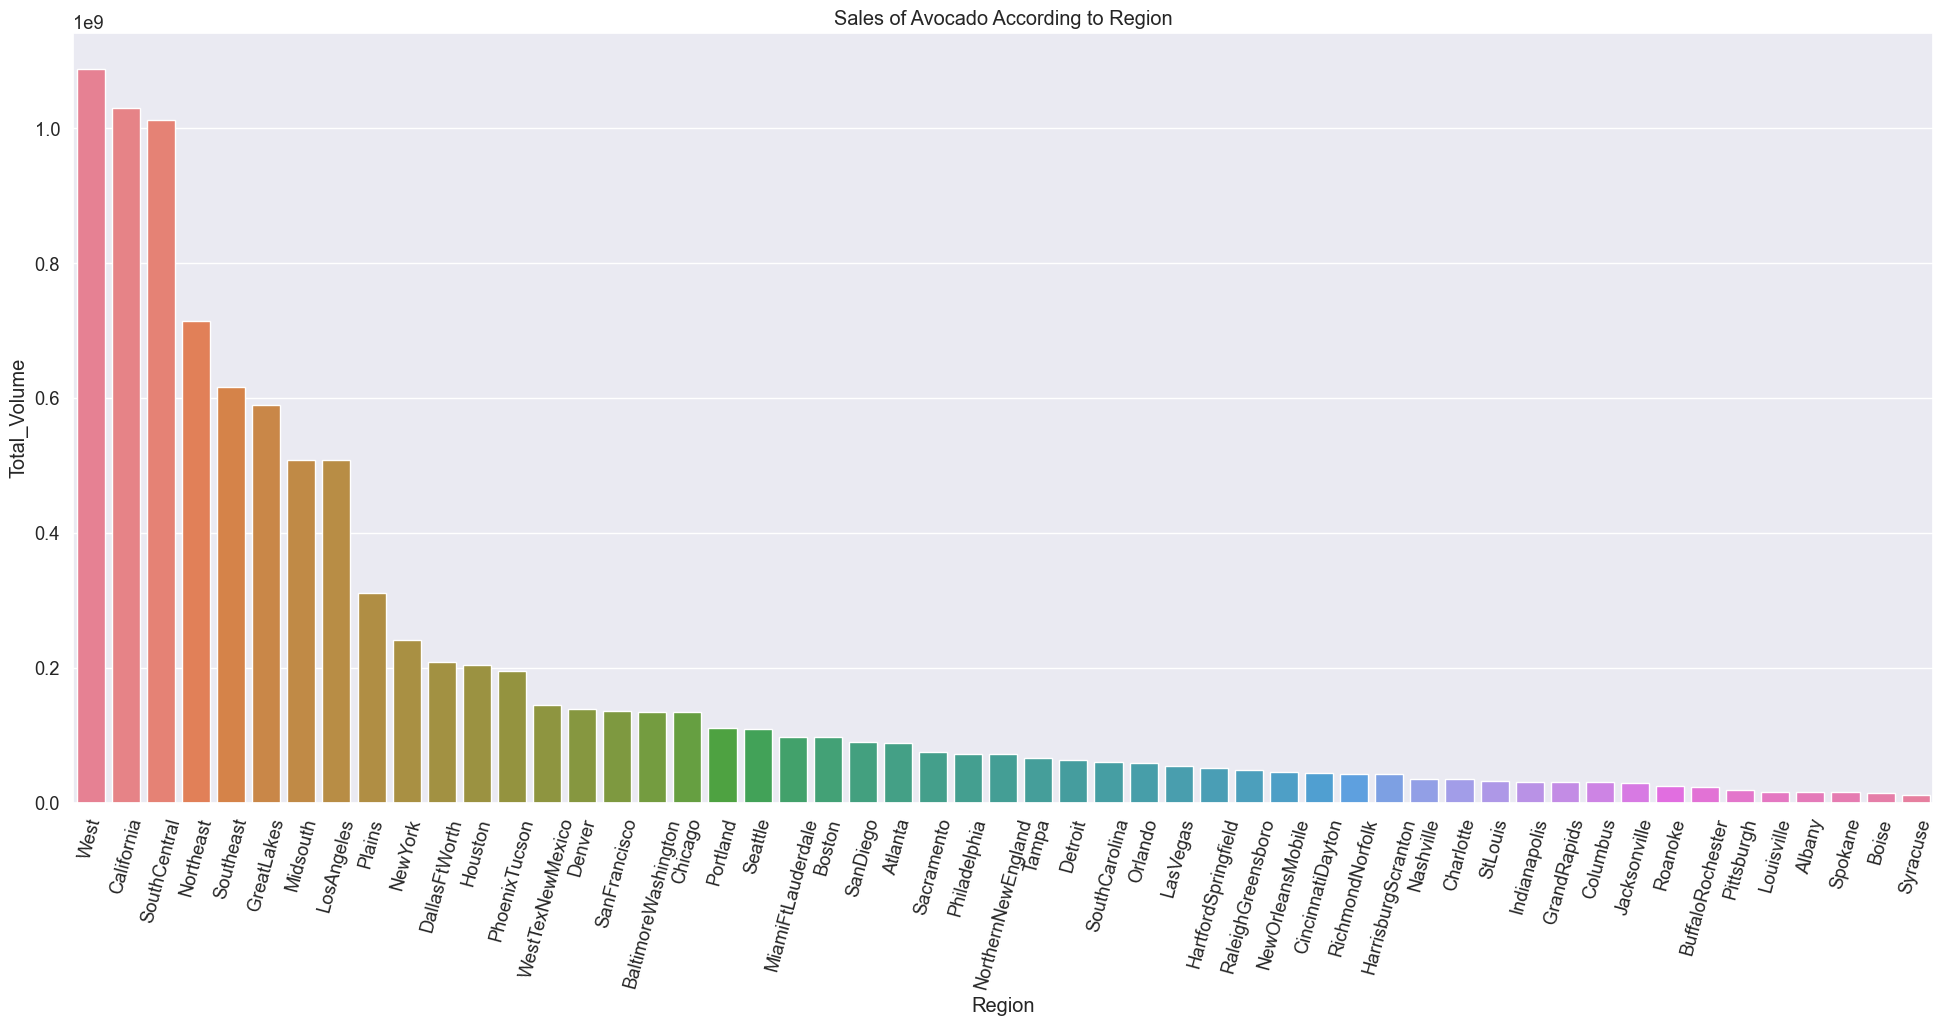

In [13]:
# select The two columns 
dfs= df[['region','Total_Volume']].copy()
dfs=dfs.query('region !="TotalUS"') # Works
# group by region
dfs=dfs.groupby(by=['region']).agg({'Total_Volume':['sum']}).reset_index().droplevel(level=1, axis=1)

# Sorting By AveragePrice
dfs=dfs.sort_values(by=['Total_Volume'],ascending=False)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=dfs.region,y=dfs.Total_Volume,hue=dfs.region)

plt.xticks(rotation=75)
plt.xlabel('Region')
plt.ylabel('Total_Volume')
plt.title('Sales of Avocado According to Region');

### 3) top 5 and bottom 5 sales regions.

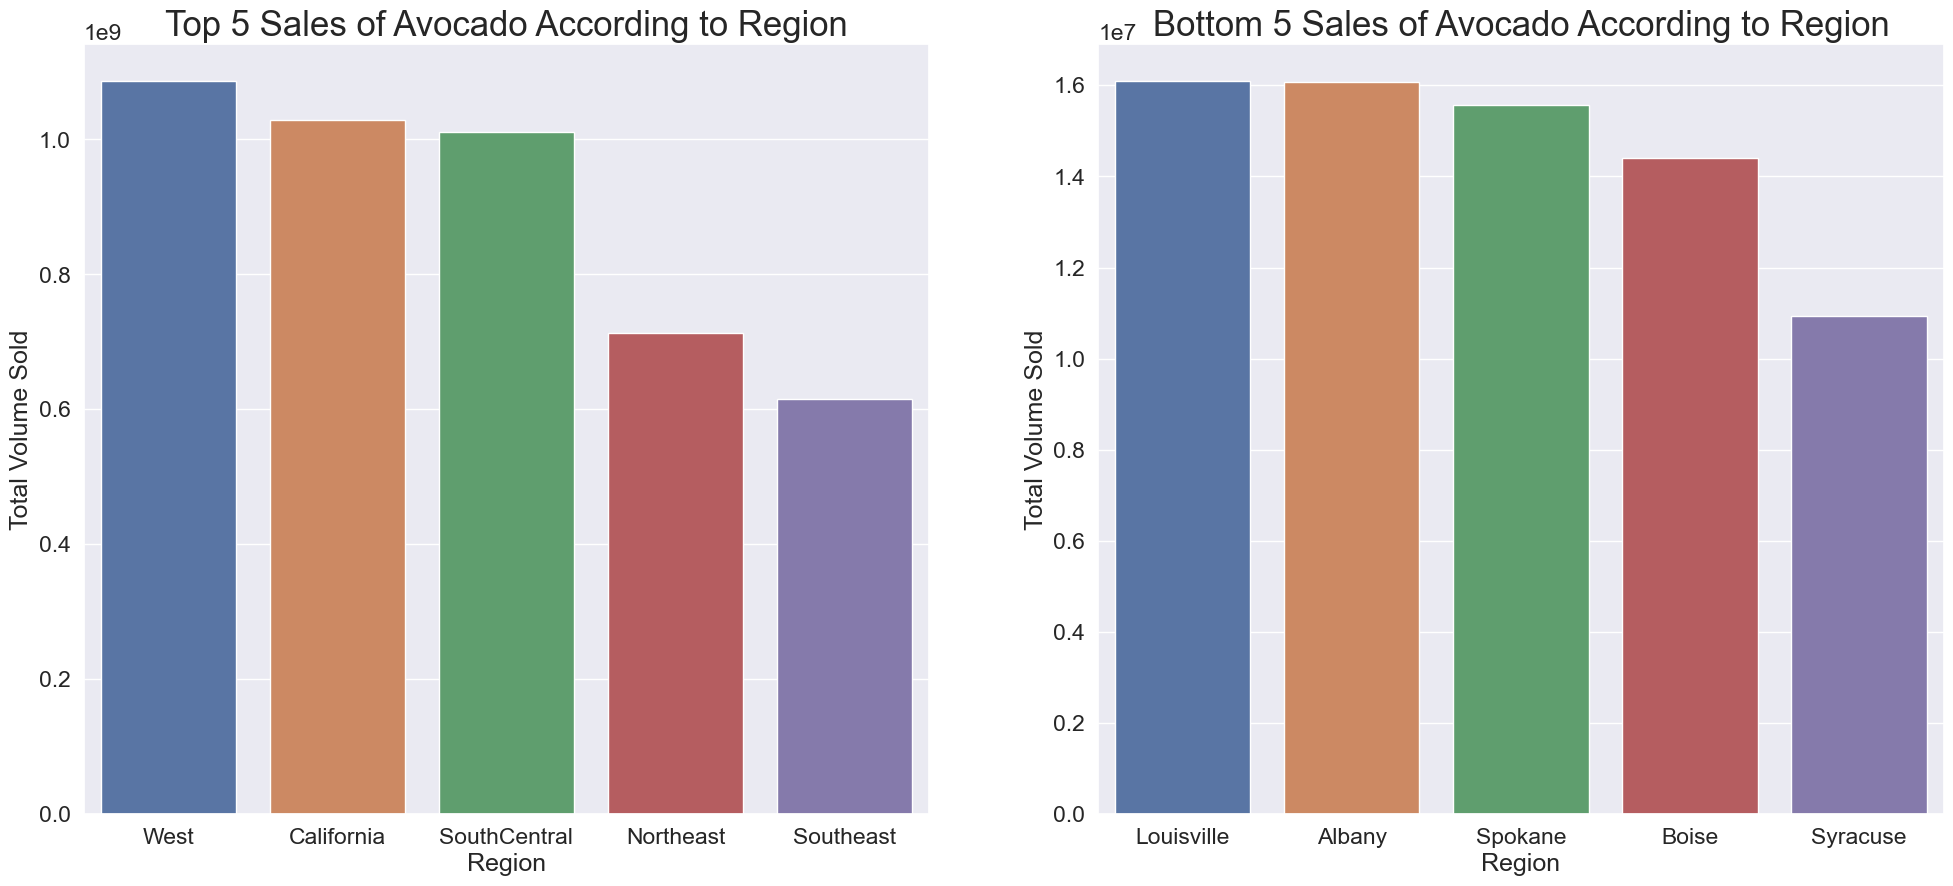

In [14]:
# Only Top 5 and bottom 5
sns.set(font_scale=1.5)
# Step4 plotting
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.barplot(x=dfs.region.head(5),y=dfs['Total_Volume'].head(5),hue=dfs.region.head(5))
plt.xlabel('Region')
plt.ylabel('Total Volume Sold')
plt.title('Top 5 Sales of Avocado According to Region',fontsize=25)

plt.subplot(1,2,2)
sns.barplot(x=dfs.region.tail(5),y=dfs['Total_Volume'].tail(5),hue=dfs.region.tail(5))
plt.xlabel('Region')
plt.ylabel('Total Volume Sold')
plt.title('Bottom 5 Sales of Avocado According to Region',fontsize=25);

### 4) sales per every quarter over the years

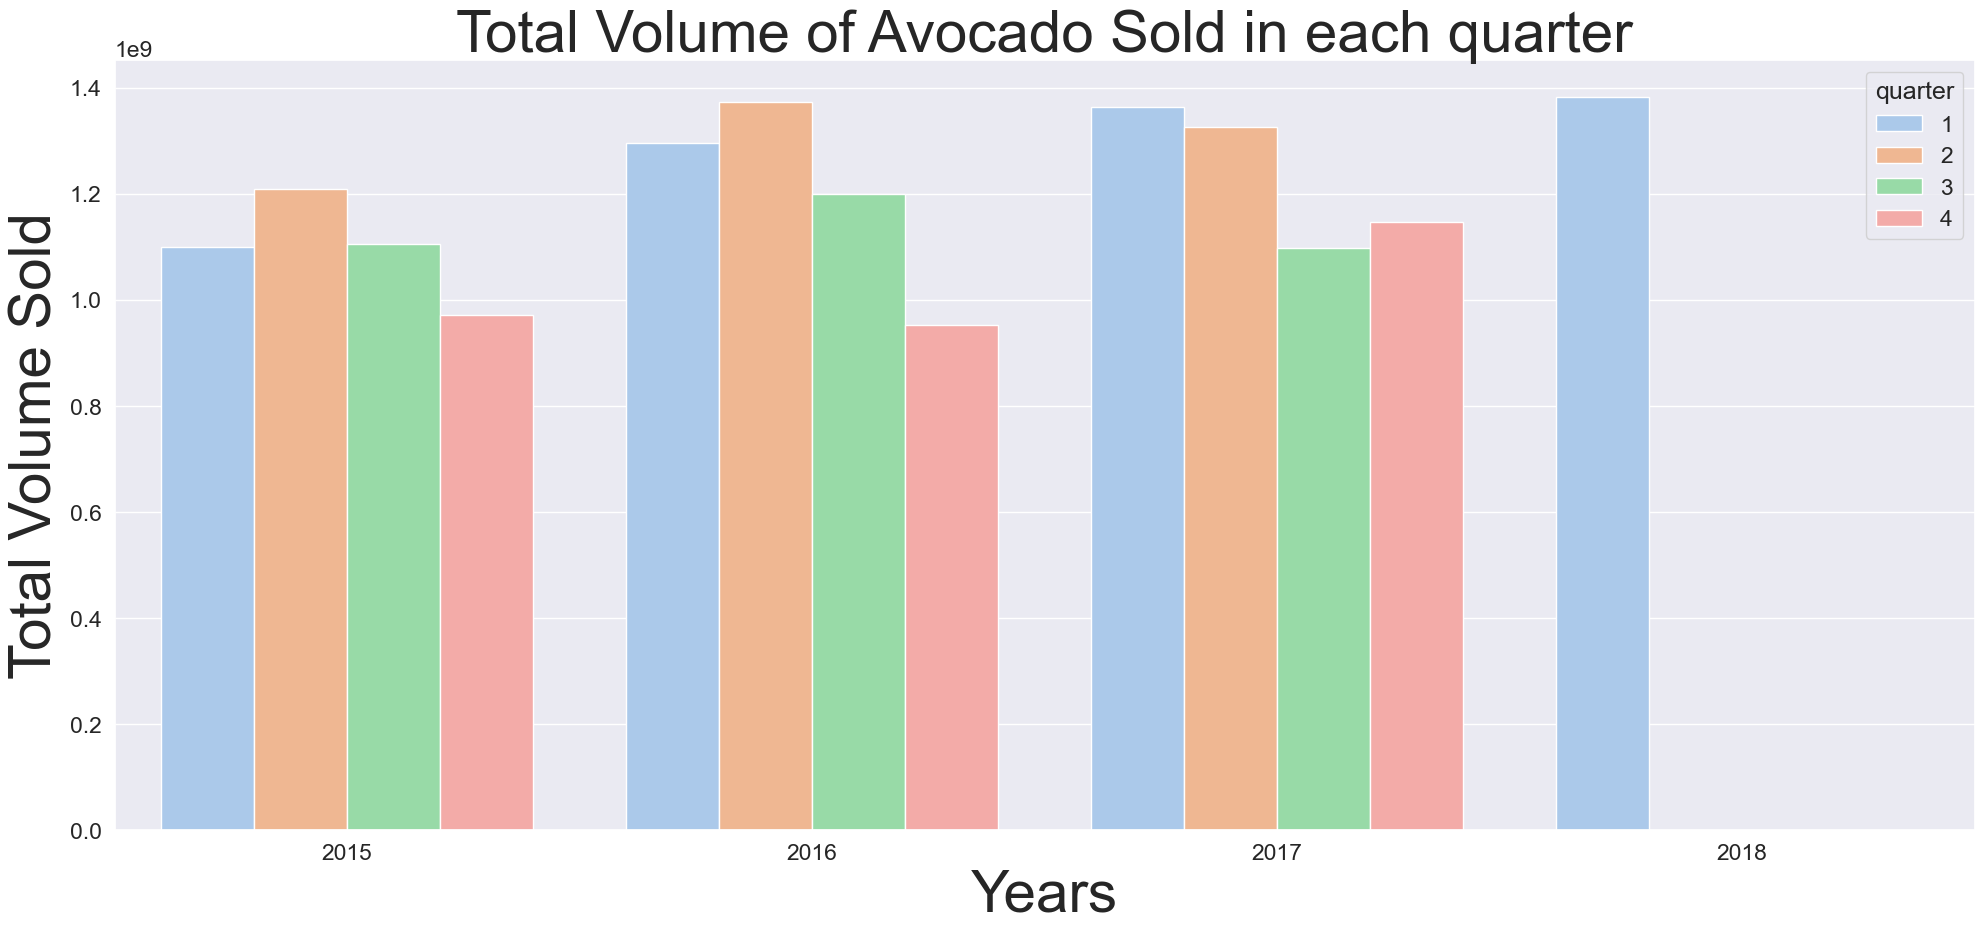

In [28]:
# select The columns 
dfs= df[['quarter','Total_Volume','year']].copy()
# group by region
dfs=dfs.groupby(by=['year','quarter']).agg({'Total_Volume':['sum']}).reset_index().droplevel(level=1, axis=1)

# Sorting By AveragePrice
# dfs=dfs.sort_values(by=['Total_Volume'],ascending=False)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=dfs.year,y=dfs.Total_Volume,hue=dfs.quarter, palette= palette_color)

plt.xticks(rotation=0)
plt.xlabel('Years', fontsize = 42)
plt.ylabel('Total Volume Sold', fontsize = 42)
plt.title('Total Volume of Avocado Sold in each quarter',fontsize = 42);

### 5) sales per months over the years

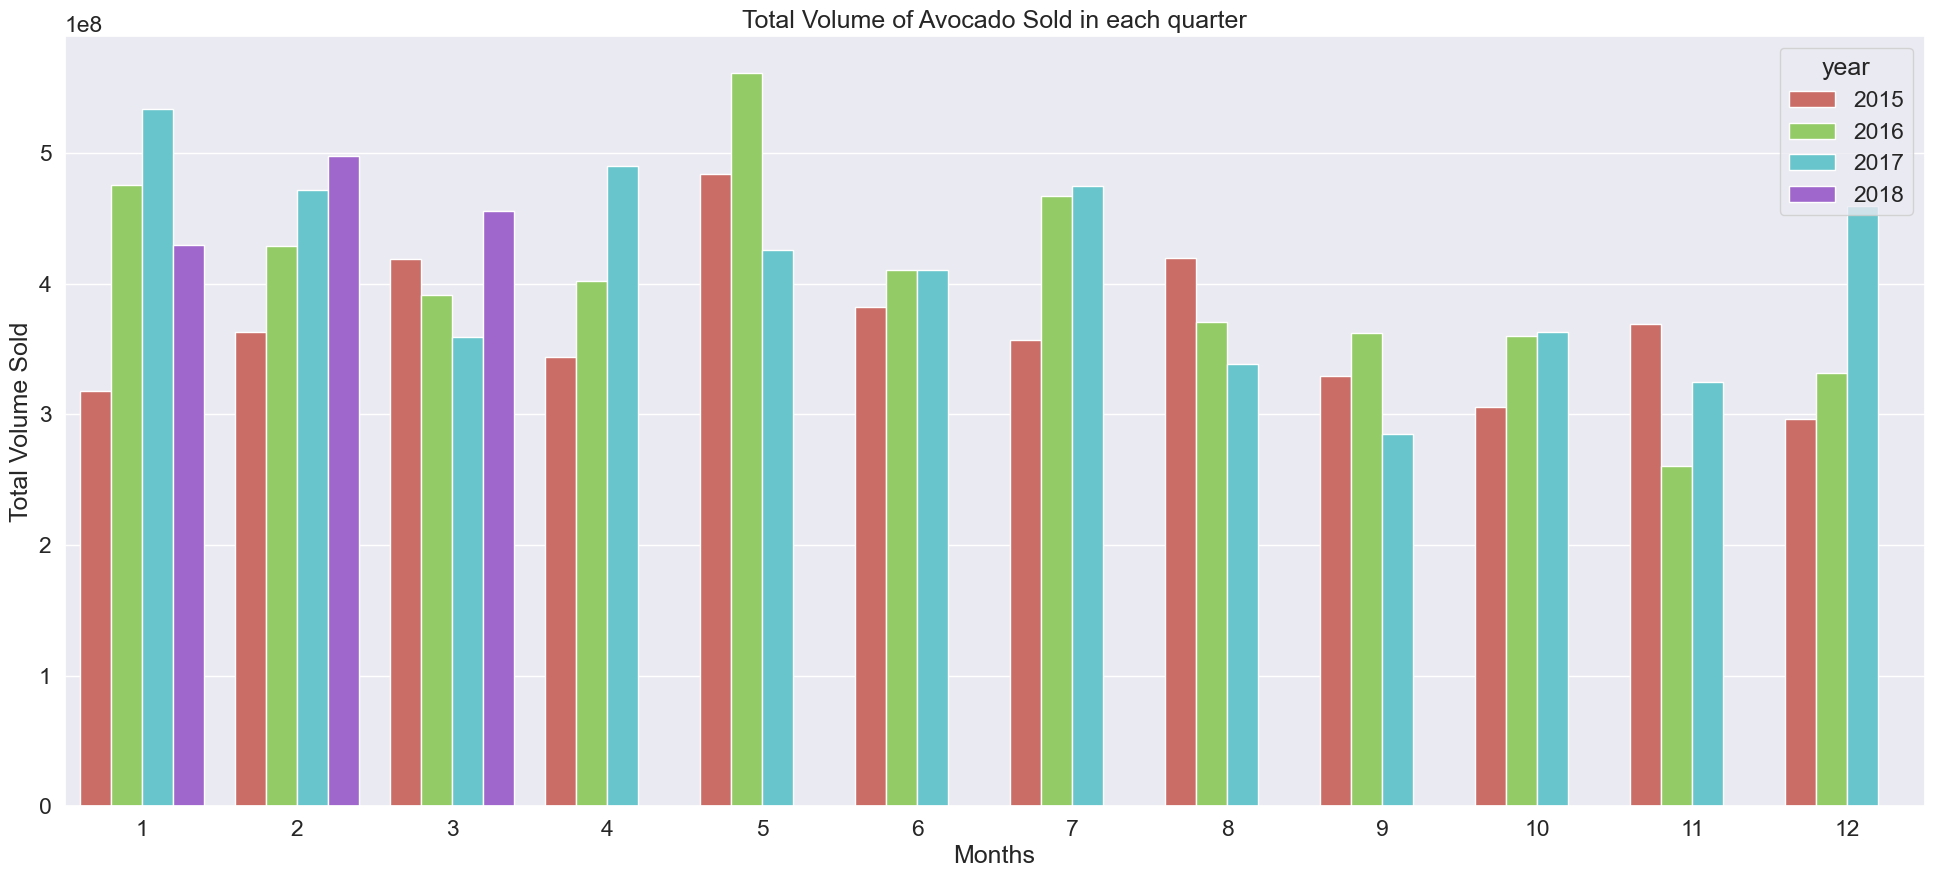

In [16]:
color_palette=sns.color_palette("hls", 4)
# select The columns 
dfs= df[['month','Total_Volume','year']].copy()
# group by region
dfs=dfs.groupby(by=['year','month']).agg({'Total_Volume':['sum']}).reset_index().droplevel(level=1, axis=1)

# Sorting By AveragePrice
# dfs=dfs.sort_values(by=['Total_Volume'],ascending=False)

plt.figure(figsize=(24,10))
sns.barplot(x=dfs.month,y=dfs.Total_Volume, palette= color_palette, hue=dfs.year)

plt.xticks(rotation=0)
plt.xlabel('Months')
plt.ylabel('Total Volume Sold')
plt.title('Total Volume of Avocado Sold in each quarter');

### 6) Price line over all days. How price is distributed over the dates?

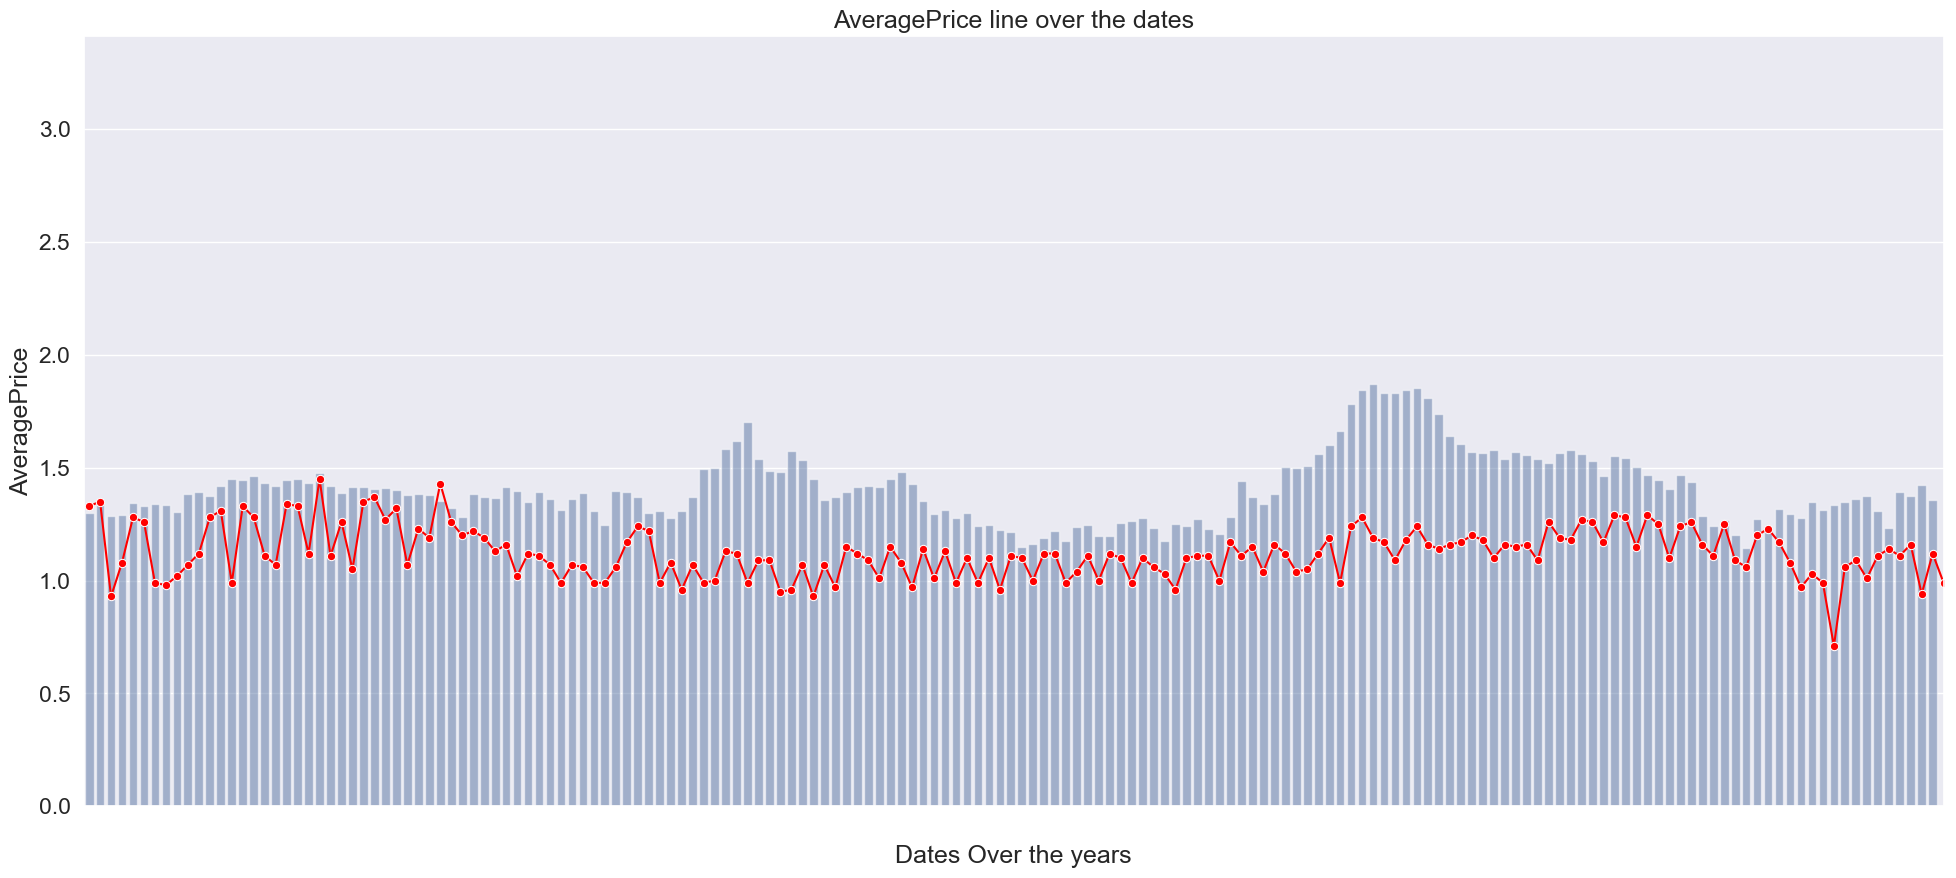

In [17]:
plt.figure(figsize=(24,10))

sns.lineplot(data = df['AveragePrice'], marker='o', sort = False, color='red')
sns.barplot(data = df, x='Date', y='AveragePrice', alpha=0.5,ci = 0);

plt.xlabel("Dates Over the years")
plt.ylabel("AveragePrice")
plt.xticks( 'Date', " ")
plt.title('AveragePrice line over the dates');

### 7) TOP 5 and bottom 5 regions of Average price?

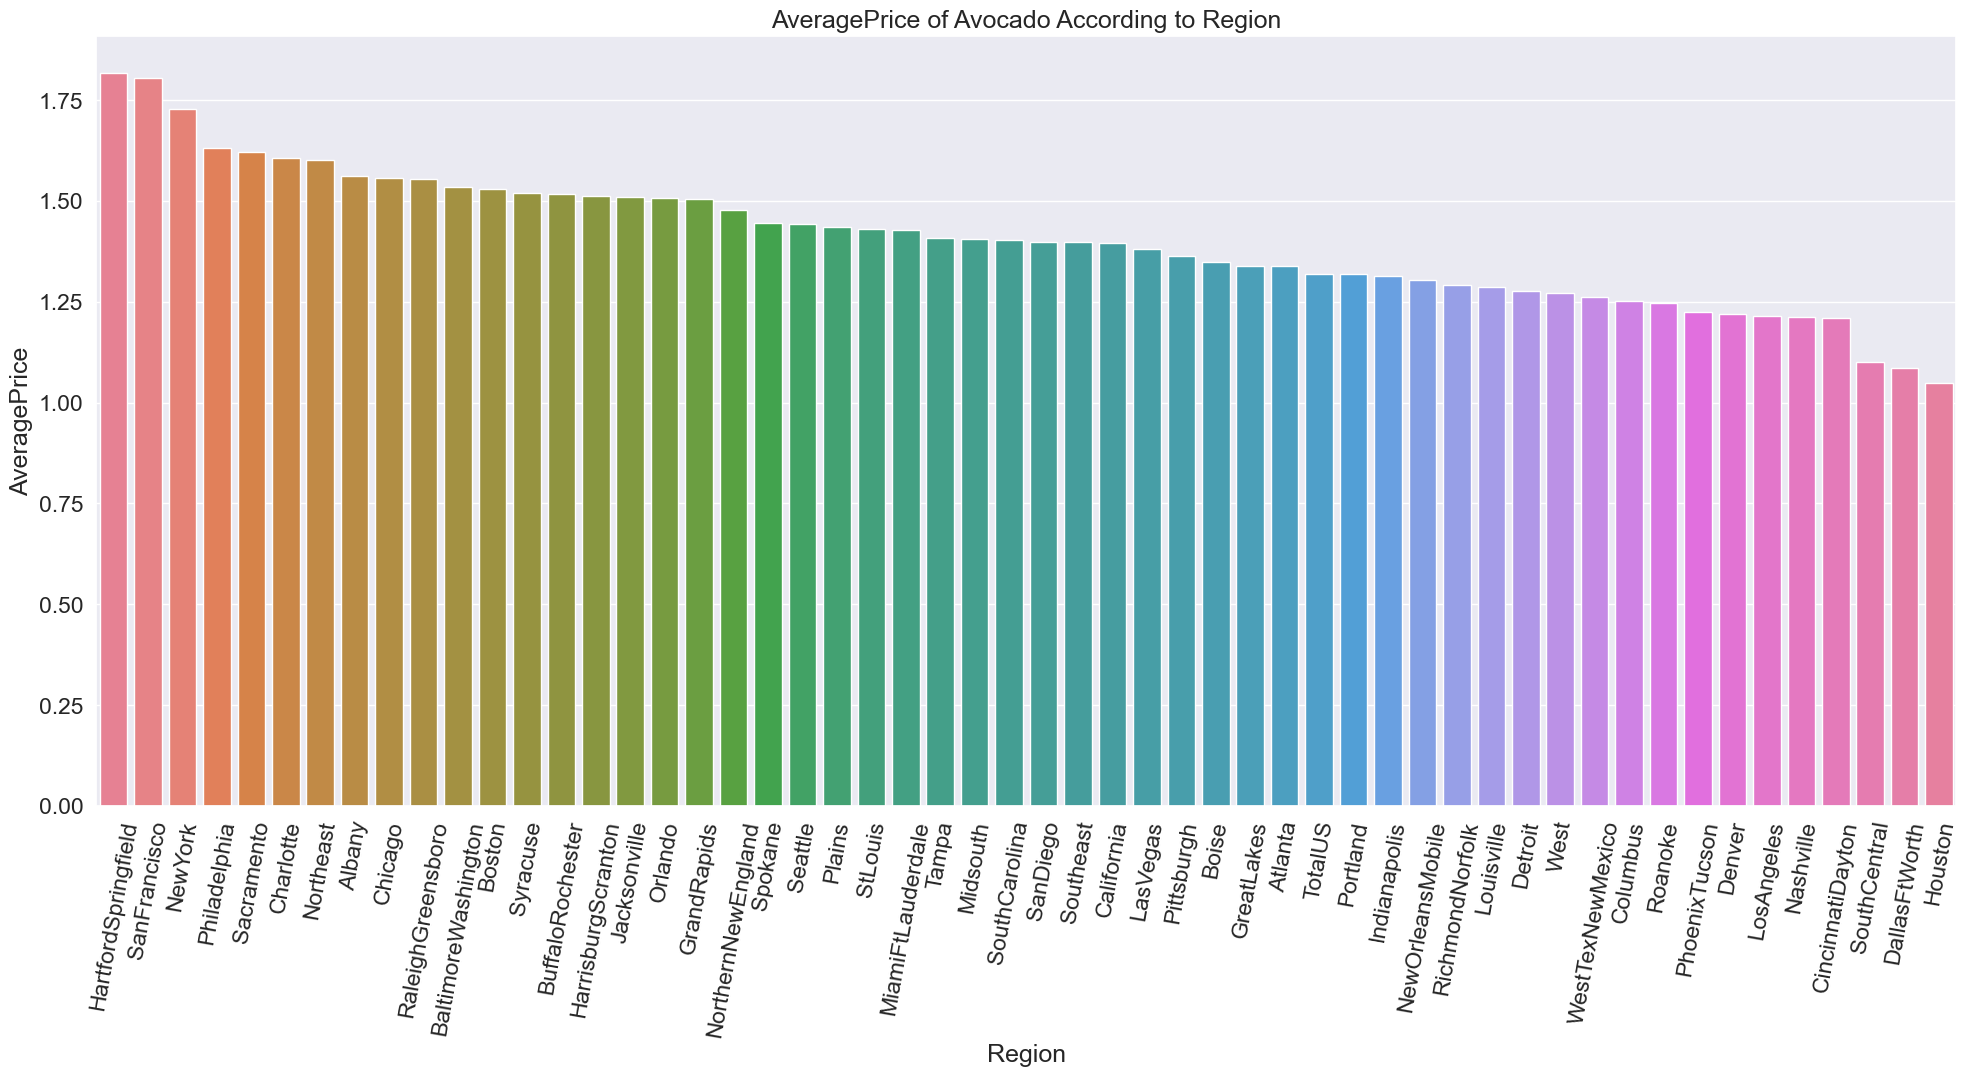

In [18]:
# select The two columns 
dfs= df[['region','AveragePrice']].copy()
# group by region
dfs=dfs.groupby(by=['region']).agg({'AveragePrice':['mean']}).reset_index().droplevel(level=1, axis=1)

# Sorting By AveragePrice
dfs=dfs.sort_values(by=['AveragePrice'],ascending=False)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=dfs.region,y=dfs.AveragePrice,hue=dfs.region)

plt.xticks(rotation=80)
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.title('AveragePrice of Avocado According to Region');

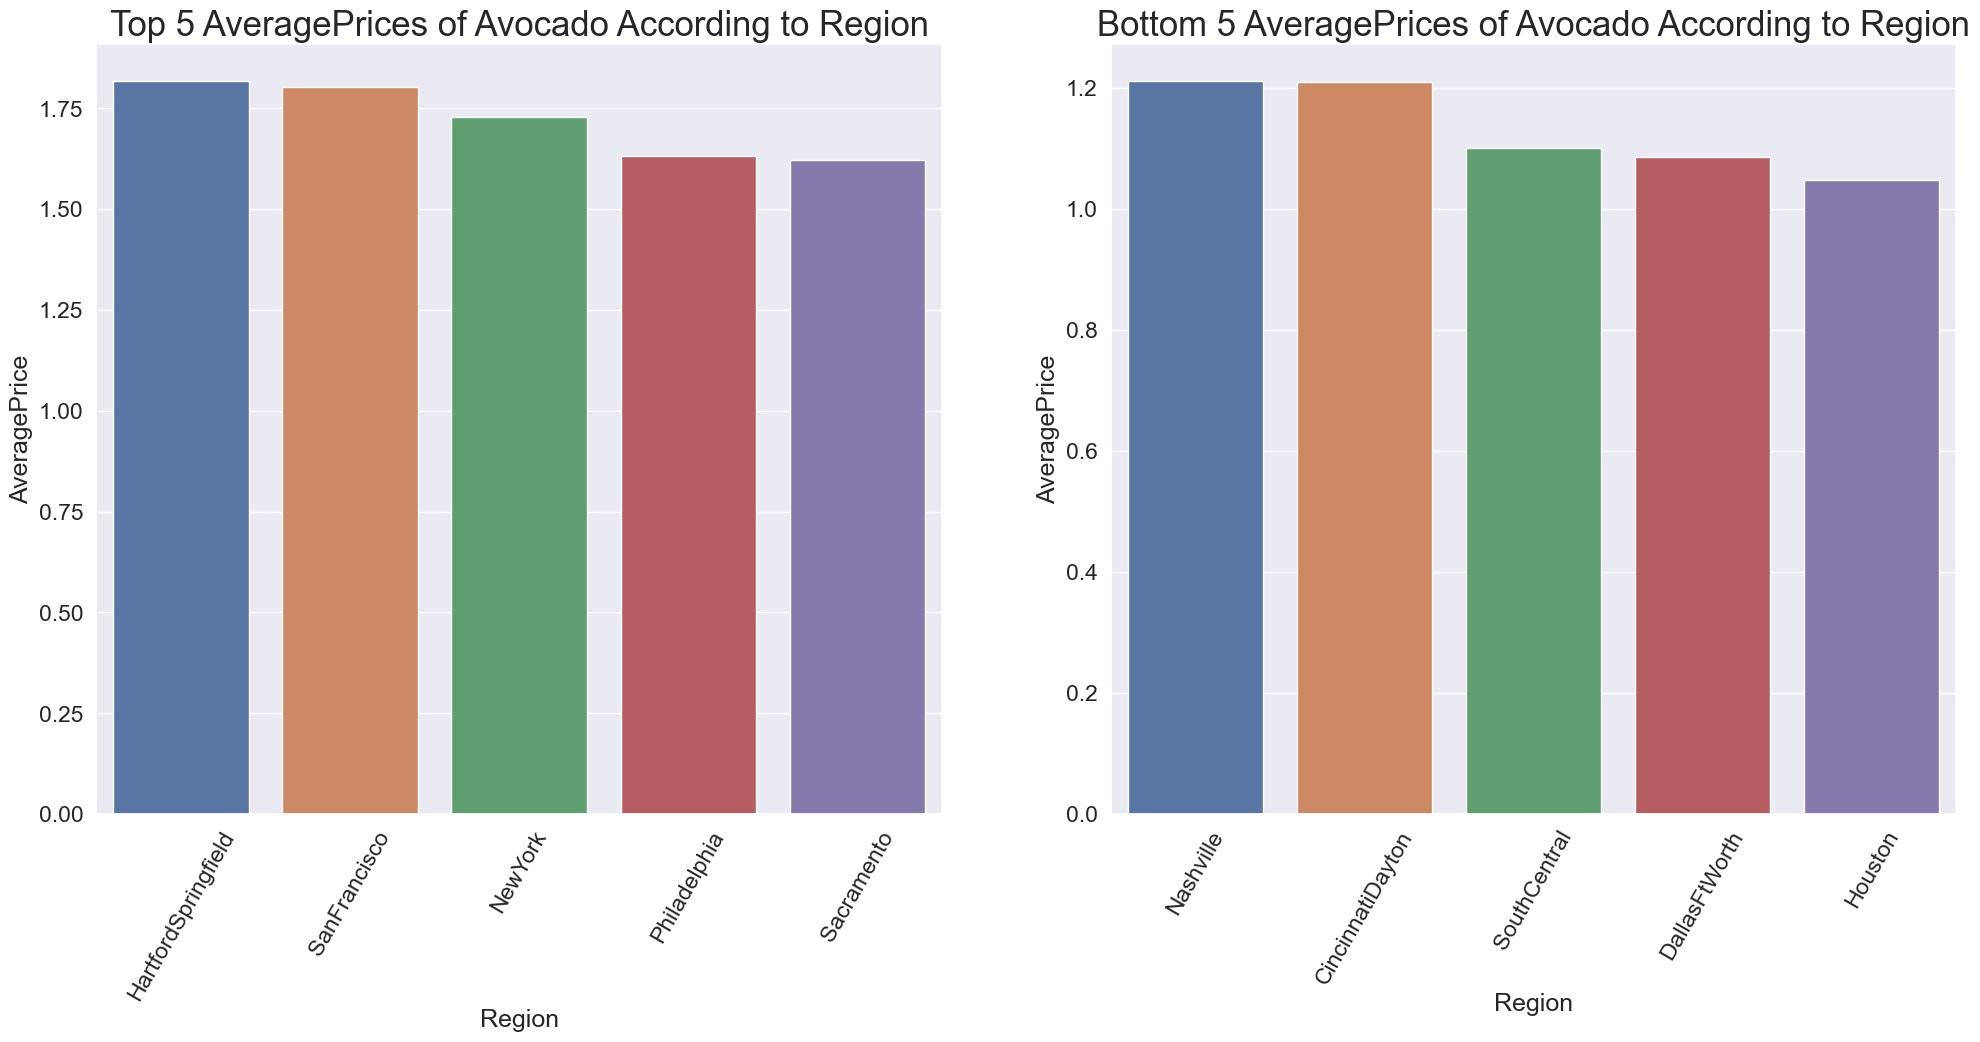

In [19]:
# Only Top 5 and bottom 5
sns.set(font_scale=1.5)
# Step4 plotting
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.barplot(x=dfs.region.head(5),y=dfs['AveragePrice'].head(5),hue=dfs.region.head(5))
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.title('Top 5 AveragePrices of Avocado According to Region',fontsize=25)
plt.xticks(rotation=60)

plt.subplot(1,2,2)
sns.barplot(x=dfs.region.tail(5),y=dfs['AveragePrice'].tail(5),hue=dfs.region.tail(5))
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.title('Bottom 5 AveragePrices of Avocado According to Region',fontsize=25);
plt.xticks(rotation=60);

### 8) In each year and for which region was the Average price the highest?

In [20]:
# Data
dfs= df[['region','AveragePrice','year']].copy()

In [21]:
dfs=dfs.loc[dfs.groupby('year')['AveragePrice'].idxmax()].reset_index()
dfs

,index,region,AveragePrice,year
0,11320,SanFrancisco,2.79,2015
1,14125,SanFrancisco,3.25,2016
2,17428,Tampa,3.17,2017
3,18116,SanFrancisco,2.30,2018


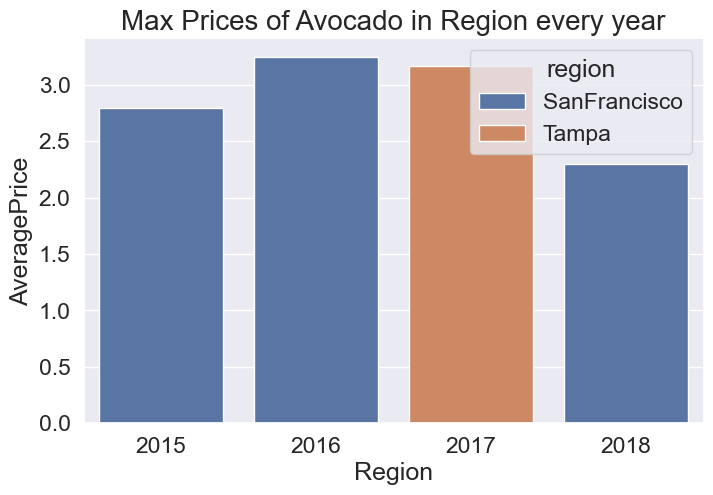

In [22]:
plt.figure(figsize=(8,5))
# sns.barplot(x=dfs.region,y=dfs['AveragePrice'],hue=dfs.year)
sns.barplot(x=dfs.year,y=dfs['AveragePrice'],hue=dfs.region)
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.title('Max Prices of Avocado in Region every year',fontsize=20);

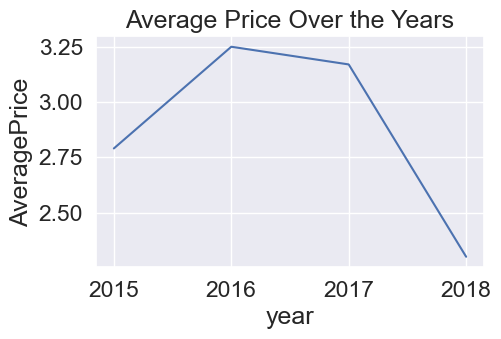

In [23]:
byDate=dfs.groupby('year').mean(numeric_only=True)
plt.figure(figsize=(5,3))
byDate['AveragePrice'].plot()
plt.ylabel('AveragePrice')
plt.title('Average Price Over the Years');

### 9) Correlation map

In [24]:
# Check Data type before correlating: 
print(df.dtypes)

Date              datetime64[ns]
AveragePrice             float64
Total_Volume             float64
4046                     float64
4225                     float64
4770                     float64
Total Bags               float64
Small Bags               float64
Large Bags               float64
XLarge Bags              float64
type                      object
year                       int64
region                    object
month                      int32
quarter                    int32
day_name                  object
years_Category          category
dtype: object


In [25]:
# Dropping categorical and time columns.
dfscorr=df.drop(['Date','type','region','day_name','years_Category'],  axis=1)
dfscorr.corr()

,AveragePrice,Total_Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,quarter
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.172177
Total_Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.025484
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.027167
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.022079
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.033886
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.023742
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.024371
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.020424
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,-0.014023
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,-0.175738


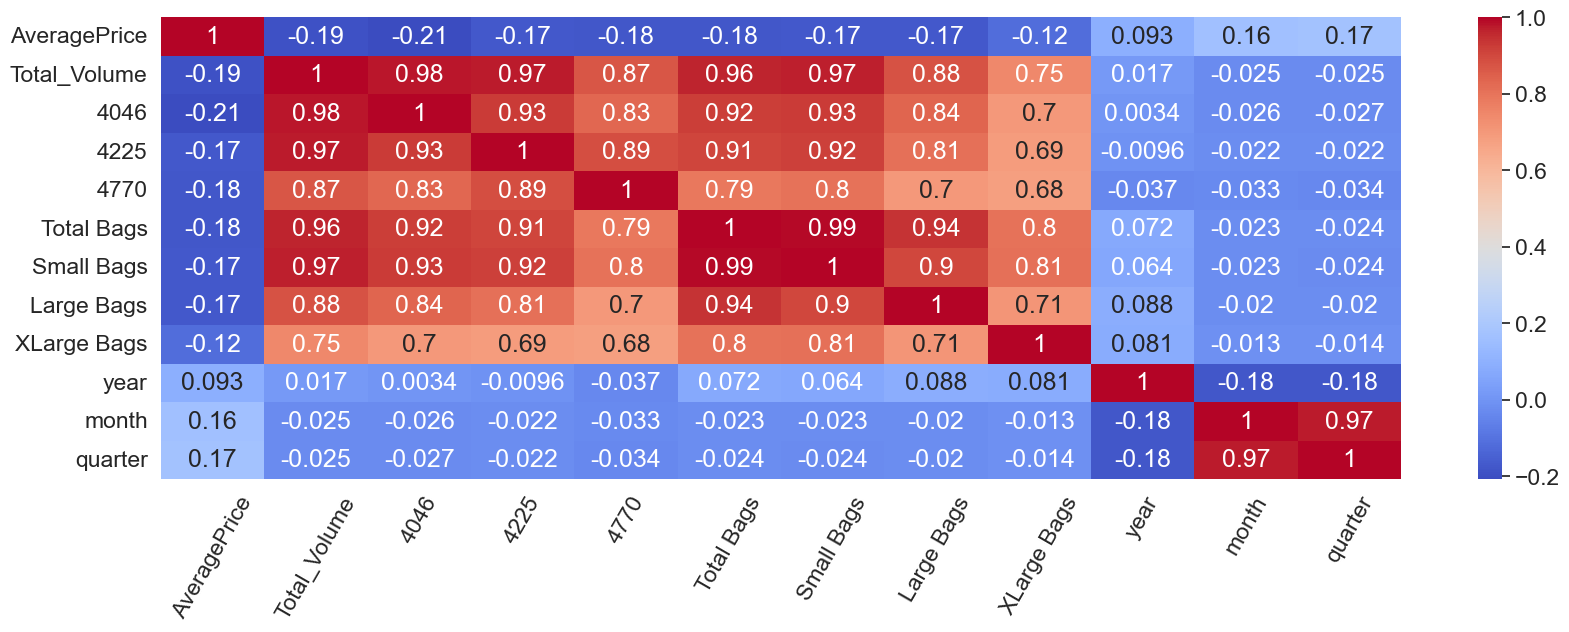

In [26]:
# Correlation Heat Map
plt.figure(figsize=(20,6))
plt.xticks(rotation=60)
sns.heatmap(dfscorr.corr(),cmap='coolwarm',annot=True);

In [27]:
# Concludes